<a href="https://colab.research.google.com/github/SzymonNowakowski/Machine-Learning-2024/blob/master/Lab07_gradient-boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 7 - Gradient Boosting

### Author: Szymon Nowakowski


# Introduction
-------------------------
Boosting (and Gradient Boosting) is a powerful ensemble learning method that builds models sequentially to correct errors made by previous models. Unlike Random Forests, which construct trees independently and then aggregate their outputs, Boosting trains models in a stage-wise fashion, minimizing a loss function at each step.

Since you have already studied **CART (Classification and Regression Trees)** and **Random Forests**, this chapter introduces Gradient Boosting as an advanced tree-based method that often outperforms Random Forests in predictive tasks.

# Algorithm: AdaBoost
------------------

Before we begin, let's review the **Adaptive Boosting (AdaBoost) algorithm** for classification.

We assume a training dataset of $n$ samples, $\{(x_i, y_i)\}_{i=1}^{n}$, where $x_i \in \mathbb{R}^d$ are input features and $y_i \in \{-1, +1\}$ are binary class labels.

---

## **Algorithm: AdaBoost**
**Input**: Training data $\{(x_i, y_i)\}_{i=1}^{n}$, weak learner $h(x; \theta)$, number of iterations $M$  
**Output**: Final ensemble model $F_M(x)$  

1. **Initialize** sample weights:  
   $$ w_i^{(1)} = \frac{1}{n}, \quad \forall i \in \{1, \dots, n\} $$

2. **For** $m = 1$ to $M$ **do**:
   1. Train weak classifier $h_m(x)$ using weighted dataset $\{(x_i, y_i, w_i^{(m)})\}$.

   2. Compute weighted classification error:
      $$ \epsilon_m = \frac{\sum_{i=1}^{n} w_i^{(m)} \mathbb{1}(h_m(x_i) \neq y_i)}{\sum_{i=1}^{n} w_i^{(m)}} $$

   3. Compute model weight:
      $$ \alpha_m = \frac{1}{2} \log \frac{1 - \epsilon_m}{\epsilon_m} $$

   4. Update sample weights:
      $$ w_i^{(m+1)} = w_i^{(m)} \exp\left(-\alpha_m y_i h_m(x_i) \right) $$

   5. Normalize weights:
      $$ w_i^{(m+1)} = \frac{w_i^{(m+1)}}{\sum_{j=1}^{n} w_j^{(m+1)}} $$

3. **Return** final classification model:
   $$ F_M(x) = \sum_{m=1}^{M} \alpha_m h_m(x) $$
   $$ \hat{y}(x) = \text{sign}(F_M(x)) $$

---

## **Notes:**
- The weak learner $h(x; \theta)$ is typically a **stump** (a decision tree of depth 1).
- AdaBoost assigns **higher weights to misclassified samples**, making future weak learners focus on harder cases.
- The model weight $\alpha_m$ determines how much influence each weak classifier has on the final prediction.
- The final ensemble decision is based on the **weighted vote** of all weak classifiers.
- Unlike standard regression boosting, AdaBoost uses **exponential reweighting** instead of residual fitting.



# Algorithm: Regression Boosting
------------------

Let's also review the boosting algorithm for regression.

We assume a training dataset of $n$ samples, $\{(x_i, y_i)\}_{i=1}^{n}$, where $x_i \in \mathbb{R}^d$ are input features and $y_i \in \mathbb{R}$ are target values.




## **Algorithm: Regression Boosting**
**Input**: Training data $\{(x_i, y_i)\}_{i=1}^{n}$, weak learner $h(x; \theta)$, number of iterations $M$  
**Output**: Final ensemble model $F_M(x)$  

1. **Initialize** the ensemble model with a constant value (e.g., the mean target value):
   $$ F_0(x) = \frac{1}{n} \sum_{i=1}^{n} y_i $$

2. **For** $m = 1$ to $M$ **do**:
   1. Compute the residuals:
      $$ r_i^{(m)} = y_i - F_{m-1}(x_i), \quad \forall i \in \{1, \dots, n\} $$

   2. Fit a weak learner $h_m(x)$ to predict residuals:
      
      $$ h_m = \arg\min_{\theta} \sum_{i=1}^{n} \left( r_i^{(m)} - h(x_i; \theta) \right)^2 $$

   3. Update the ensemble model:
      $$ F_m(x) = F_{m-1}(x) + \lambda h_m(x) $$

      where $\lambda$ is a shrinkage parameter (learning rate) controlling the contribution of each weak learner.

3. **Return** final model $F_M(x)$.

---

## **Notes:**
- The weak learner $h(x; \theta)$ is typically a shallow regression tree or another simple model.
- This algorithm directly fits weak learners to residual errors.
- The shrinkage parameter $\lambda$ prevents overfitting by controlling the influence of each weak model.



# Forward Stagewise Additive Modelling (FSAM)
------------------

At first glance, the algorithms for **Regression Boosting** and **AdaBoost** appear quite different. However, both can be seen as instances of a **more general framework**: **Forward Stagewise Additive Modelling (FSAM)**.

FSAM builds a function $F(x)$ incrementally by minimizing a loss function $L(y, F(x))$ in a stagewise fashion.



## **Algorithm: Forward Stagewise Additive Modeling**


**Input**: Training data $\{(x_i, y_i)\}_{i=1}^{N}$, number of iterations $M$

**Output**: Estimated function $\hat{f}(x)$

1. **Initialize** the function estimate:
   $$
   f_0(x) = 0
   $$

2. **For** $m = 1$ to $M$:
   - (a) Compute:
     $$
     (\beta_m, \gamma_m) = \arg\min_{\beta, \gamma} \sum_{i=1}^{N} L(y_i, f_{m-1}(x_i) + \beta b(x_i; \gamma))
     $$
   - (b) Update the function estimate:
     $$
     f_m(x) = f_{m-1}(x) + \beta_m b(x; \gamma_m)
     $$

3. **Output** the final model:
   $$
   \hat{f}(x) = f_M(x)
   $$

**Notes**:
- The basis functions $b(x; \gamma)$ are typically simple functions (e.g., decision stumps or trees) parameterized by $\gamma$.
- The algorithm incrementally builds the model by adding new basis functions at each iteration to minimize the loss function $L(y, f(x))$.
- The choice of loss function $L$ influences the behavior and robustness of the model.




### Role of $\gamma$ (Structure Parameter)

$\gamma$ parametrizes the basis function $b(x; \gamma)$.  
It determines the structure or specific form of the weak learner being added.

**Example:**  
- If $b(x; \gamma)$ is a **decision tree**, then $\gamma$ could represent:
  - The split point(s) of the tree.
  - The features chosen for splitting.
  - The depth of the tree.
- If $b(x; \gamma)$ is a **linear function**, then $\gamma$ could be:
  - The slope and intercept of the line.


### Role of $\beta$ (Scaling Parameter)

$\beta$ determines how much influence the new basis function $b(x; \gamma)$ has in the updated model.  
It acts as a coefficient that controls the step size in the direction of the selected weak learner.

**Example:**  
If we are minimizing squared error, $\beta$ could be chosen as:

$$
\beta_m = \arg\min_{\beta} \sum_{i=1}^{N} \left( y_i - ( f_{m-1}(x_i) + \beta b(x_i; \gamma_m) ) \right)^2
$$

which means we find $\beta$ that minimizes the squared error after adding the weak learner.

If $b(x; \gamma)$ is a **decision tree predicting residuals**, $\beta$ **scales the tree’s predictions** before adding it to the ensemble.

Thus, $\beta$ controls the **contribution (weight) of each new weak learner** in the final boosted model.
With $\beta = 1.0$, the model would assume that the weak learner's predictions are **perfectly scaled** to correct the residual errors. However, this is rarely the case.

## Connection of FSAM and other Boosting Techniques

📚 **See also** → *The Elements of Statistical Learning*:  
Trevor Hastie, Robert Tibshirani, and Jerome Friedman, Springer, 2009.  
[📖 Link to the book](https://hastie.su.domains/ElemStatLearn/)
(Chapter 10.3)

For the squared loss function:

$$
L(y,F(x))=(y−F(x))^2
$$

substituting this into the given equation gives:

$$
(\beta_m, \gamma_m) = \arg\min_{\beta, \gamma} \sum_{i=1}^{N} (y_i - (f_{m-1}(x_i) + \beta b(x_i; \gamma)))^2
$$

Now, rewriting in terms of residuals:

$$
r_i^{(m)} = y_i - f_{m-1}(x_i)
$$

Substituting $r_i^{(m)}$ into the equation:

$$
(\beta_m, \gamma_m) = \arg\min_{\beta, \gamma} \sum_{i=1}^{N} (r_i^{(m)} - \beta b(x_i; \gamma))^2
$$

This shows that in the case of squared loss, the optimization problem in Forward Stagewise Additive Modeling naturally decomposes into residual fitting which (modulo shrinkage parameters) is in essence Regression Boosting.

Similarly, we can show that AdaBoost is the Forward Stagewise Additive Modeling algorithm with exponential loss $L(y, F(x)) = e^{-yF(x)}$.


## Visualising Loss Functions - Classification

I will reproduce **Figure 10.4** from the *The Elements of Statistical Learning* book.

All losses are shown as functions of the margin $x = yf$, where $y \in \{\pm1\}$ is the label and $f$ is the real-valued prediction. By defining everything in terms of $x = yf$, each loss becomes a one-dimensional function $L(x)$. Let's also ensure that each loss passes through $(0,1)$.


### How We Handle Functions Not Obviously in Terms of $x = yf$

1. **Cross-Entropy (Logistic) Loss**

  The standard form for a label $y \in \{\pm1\}$ and prediction $f$ is:

  $$
  L_{\text{logistic}}(y, f) = \log(1+e^{-yf}).
  $$

  By setting $x = yf$, this becomes:

  $$
  \log(1+e^{-x}).
  $$

  Since $\log(1+e^0) = \log(2)$, we divide by $\log(2)$ so that $L(0) = 1$.

2. **Squared Error**

  If the model aims to fit $y \in \{\pm1\}$ with a real-valued $f$, the squared loss is:

  $$
  (y - f)^2.
  $$

  In terms of $x = yf$:

  - If $y = +1$, then $x = f$, and so:

    $$
    (1 - f)^2 = (1 - x)^2.
    $$

  - If $y = -1$, then $x = -f$, and so:

    $$
    (y - f)^2 = (-1 - f)^2.
    $$

    This also reduces to:

    $$
    (1 - x)^2
    $$

    when expressed in $x$.

All these formulations ensure each curve intersects the point $(0,1)$, making for an intuitive comparison of how different losses penalize mistakes around the decision boundary ($x = 0$).


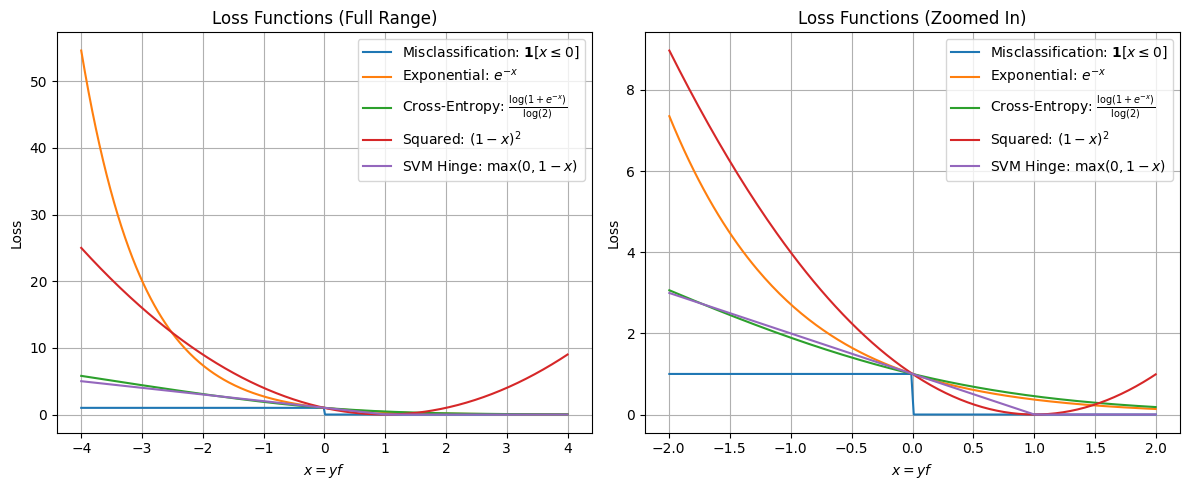

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range of x = y f for full computation (-4 to 4)
x_full = np.linspace(-4, 4, 400)

# Compute loss functions over the full range
misclassification = (x_full <= 0).astype(float)  # Misclassification Error
exponential_loss = np.exp(-x_full)  # Exponential Loss
logistic_loss = np.log(1 + np.exp(-x_full)) / np.log(2)  # Binomial Cross-Entropy Loss = Logistic Loss (scaled)
squared_loss = (1 - x_full) ** 2  # Squared Error Loss
hinge_loss = np.maximum(0, 1 - x_full)  # SVM Hinge Loss

# Store computed losses in a dictionary with proper mathematical labels
losses = {
    r'Misclassification: $\mathbf{1}[x \leq 0]$': misclassification,
    r'Exponential: $e^{-x}$': exponential_loss,
    r'BinCross-Entropy: $\frac{\log(1 + e^{-x})}{\log(2)}$': logistic_loss,
    r'Squared: $(1 - x)^2$': squared_loss,
    r'SVM Hinge: $\max(0, 1 - x)$': hinge_loss
}

# Define the zoomed-in range (-2 to 2) by selecting the precomputed values
zoom_indices = (x_full >= -2) & (x_full <= 2)
x_zoom = x_full[zoom_indices]

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot full range (-4 to 4)
for label, loss_values in losses.items():
    axes[0].plot(x_full, loss_values, label=label)

axes[0].set_xlabel(r'$x = y f$')
axes[0].set_ylabel('Loss')
axes[0].set_title('Loss Functions (Full Range)')
axes[0].legend()
axes[0].grid(True)

# Plot zoomed-in range (-2 to 2) using precomputed values
for label, loss_values in losses.items():
    axes[1].plot(x_zoom, loss_values[zoom_indices], label=label)

axes[1].set_xlabel(r'$x = y f$')
axes[1].set_ylabel('Loss')
axes[1].set_title('Loss Functions (Zoomed In)')
axes[1].legend()
axes[1].grid(True)

# Show plots
plt.tight_layout()
plt.show()


## Visualizing Loss Functions - Regression

I will reproduce **Figure 10.5** from *The Elements of Statistical Learning*; this time for regression loss functions.

All losses are shown as functions of the **prediction error** $x = y - f$, where $y$ is the true target value, and $f$ is the real-valued prediction. By defining everything in terms of $x = y - f$, each loss function becomes a one-dimensional function $L(x)$.

This allows for a direct comparison of different regression loss functions, highlighting their sensitivity to errors and their robustness to outliers.


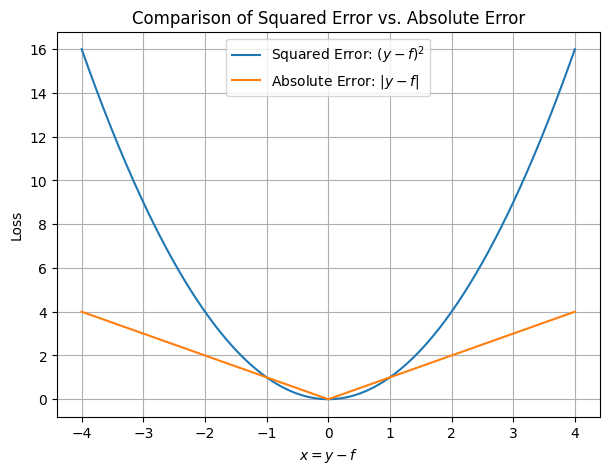

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range of x = y - f (difference between true label and prediction)
x = np.linspace(-4, 4, 400)

# Compute the loss functions
squared_error_loss = (x) ** 2  # Squared Error Loss: (y - f)^2
absolute_error_loss = np.abs(x)  # Absolute Error Loss: |y - f|

# Store computed losses with proper mathematical labels
losses = {
    r'Squared Error: $(y - f)^2$': squared_error_loss,
    r'Absolute Error: $|y - f|$': absolute_error_loss
}

# Create a plot
plt.figure(figsize=(7, 5))

# Plot the losses
for label, loss_values in losses.items():
    plt.plot(x, loss_values, label=label)

# Labels and title
plt.xlabel(r'$x = y - f$')
plt.ylabel('Loss')
plt.title('Comparison of Squared Error vs. Absolute Error')

# Legend
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


## Problems with FSAM

The problem is that FSAM translates into managable computationally algorithms for unrobust loss functions (exponential loss, squared error loss). However, for robust loss functions (e.g. **classification**: *binary cross entropy loss*, which behaves linearly over wide ranges of values, **regression**: *absolute error*) the FSAM algorithm is intractable.  


## The Idea Behind Gradient Boosting

Gradient Boosting builds an additive model of weak learners (typically decision trees) to minimize a given loss function. The model is updated iteratively:

1. Start with an initial model, typically a constant value:

   $$ F_0(x) = \arg\min_c \sum_{i=1}^{n} L(y_i, c) $$

   where $L(y_i, c)$ is the loss function (e.g., squared loss for regression or log loss for classification).

2. For each iteration $m$, compute the residuals (pseudo-residuals):

   $$ r_{i}^{(m)} = -\left[ \frac{\partial L(y_i, F(x_i))}{\partial F(x_i)} \right]_{F=F_{m-1}} $$

   This represents the negative gradient of the loss function.

3. Fit a new weak learner $h_m(x)$ (a shallow decision tree) to predict these residuals.

4. Update the model:

   $$ F_m(x) = F_{m-1}(x) + \eta h_m(x) $$

   where $\eta$ (learning rate) controls the contribution of each weak learner.



## Comparing Gradient Boosting to Random Forests

| Feature              | Random Forests                          | Gradient Boosting                    |
|----------------------|--------------------------------|--------------------------------|
| Model Structure     | Ensemble of independent trees | Trees built sequentially       |
| Training Process   | Uses bagging (parallel training) | Boosting (sequential corrections) |
| Overfitting Risk   | Lower (averaging reduces variance) | Higher (but can be controlled) |
| Performance        | Strong, but may not optimize loss | Often superior for complex tasks |
| Speed             | Faster (can be parallelized) | Slower (sequential training) |





## Hyperparameters in Gradient Boosting

Tuning hyperparameters is crucial for Gradient Boosting performance. Key parameters include:

- **Learning Rate $\eta$**: Controls how much each tree contributes. Small values (e.g., 0.01) require more trees.
- **Number of Trees $M$**: Too many trees may lead to overfitting.
- **Tree Depth $d$**: Controls the complexity of each tree. Shallow trees (e.g., depth = 3-5) work well.
- **Min Samples Split & Min Samples Leaf**: Define when to stop growing trees.
- **Subsample**: Fraction of data used to train each tree, introducing randomness (like in Random Forests).



In the next section, we will implement Gradient Boosting in Python using `scikit-learn` and `XGBoost`.
